In [1]:
from functools import partial
from math import pi, sqrt
from plotly import express as px


from ket import *
from ket import ket_version

ket_version()

['Ket v0.9.0b3',
 'libket v0.6.0 [rustc 1.82.0 (f6e511eec 2024-10-15) x86_64-unknown-linux-gnu]',
 'kbw v0.4.0 [rustc 1.82.0 (f6e511eec 2024-10-15) x86_64-unknown-linux-gnu]']

In [2]:
from ket.amazon import AmazonBraket

## Testes

In [3]:
print("Iniciando criação do AmazonBraket...")
try:
    braket = AmazonBraket(num_qubits=2)
    print("AmazonBraket criado com sucesso.")
except Exception as e:
    print(f"Erro ao criar AmazonBraket: {e}")

Iniciando criação do AmazonBraket...
AmazonBraket criado com sucesso.


In [4]:
print("Iniciando braket.connect()...")
try:
    ket_configuration = braket.connect()
    print("braket.connect() executado com sucesso.")
except Exception as e:
    print(f"Erro ao executar braket.connect(): {e}")

Iniciando braket.connect()...
braket.connect() executado com sucesso.


In [5]:
print("Iniciando Process(ket_configuration)...")
try:
    # p = Process(ket_configuration)
    p = Process(braket)
    print("Process criado com sucesso.")
except Exception as e:
    print(f"Erro ao criar Process: {e}")

Iniciando Process(ket_configuration)...
Process criado com sucesso.


## Bell

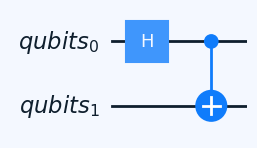

In [6]:
def bell(qubits):
    H(qubits[0])
    CNOT(qubits[0],qubits[1])

qulib.draw(bell, num_qubits=2)

### AmazonBraket

In [7]:
braket = AmazonBraket(num_qubits=2)

p = Process(braket)

qubits = p.alloc(2)

bell(qubits)

sample(qubits).get()

{3: 982, 0: 1066}

### Ket

In [8]:
p = Process()

qubits = p.alloc(2)

bell(qubits)

sample(qubits, shots=2048).get()

{0: 1032, 3: 1016}

## GHZ

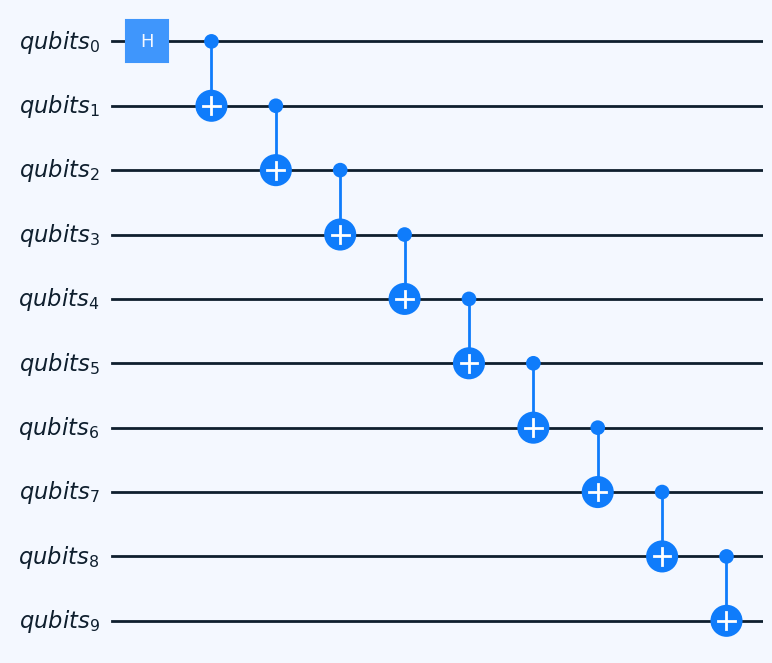

In [9]:
def ghz(qubits):
    H(qubits[0])

    for i in range(len(qubits)-1):
        CNOT(qubits[i], qubits[i+1])

qulib.draw(ghz, num_qubits=10)

### AmazonBraket

In [10]:
braket = AmazonBraket(num_qubits=10)

p = Process(braket)

qubits = p.alloc(10)

ghz(qubits)

sample(qubits).get()

{0: 1012, 1023: 1036}

### Ket

In [11]:
p = Process()

qubits = p.alloc(10)

ghz(qubits)

sample(qubits).get()

{0: 975, 1023: 1073}

## RXX, RYY, RZZ

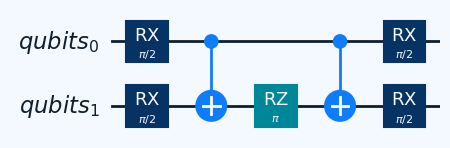

In [ ]:
def rxx_circuit(qubits, angle):
    for q in qubits:
        H(q)
    CNOT(qubits[0], qubits[1])
    RZ(pi, qubits[1])
    CNOT(qubits[0], qubits[1])
    for q in qubits:
        H(q)

def ryy_circuit(qubits, angle):
    RX(pi/2, qubits[0])
    RX(pi/2, qubits[1])
    CNOT(qubits[0], qubits[1])
    RZ(pi, qubits[1])
    CNOT(qubits[0], qubits[1])
    RX(pi/2, qubits[1])
    RX(pi/2, qubits[0])

def rzz_circuit(qubits, angle):
    CNOT(qubits[0], qubits[1])
    RZ(pi, qubits[1])
    CNOT(qubits[0], qubits[1])

# qulib.draw(rxx_circuit, num_qubits=2)
qulib.draw(ryy_circuit, num_qubits=2)
# qulib.draw(rzz_circuit, num_qubits=2)

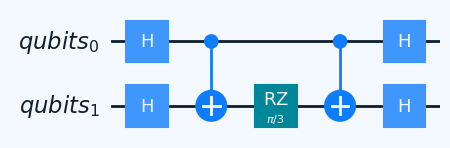

In [ ]:
def rxx_circuit(angle, qubits):
    with around(cat(kron(H, H), CNOT), *qubits):
        RZ(angle, qubits[1])

angle = pi / 3

qulib.draw(rxx_circuit, num_qubits=2, args=(angle,))

### AmazonBraket

In [26]:
braket = AmazonBraket(num_qubits=2)

p = Process(braket)

qubits = p.alloc(2)

rxx_circuit(qubits)

sample(qubits).get()

{3: 2048}

In [27]:
p = Process()

qubits = p.alloc(2)

rxx_circuit(qubits)

sample(qubits).get()

{3: 2048}